In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Problem 1.2

## Data Generation

In [2]:
sigma = [0.5, 1, 2, 4, 8]
synthetic_set_X = [[], [], [], [], []]
synthetic_set_Y = [[], [], [], [], []]

for i in range(0,5):
    x1, y1 = np.random.multivariate_normal([-1,-1], np.array([[2, 0.5],[0.5, 1]])*sigma[i], 100).T
    x2, y2 = np.random.multivariate_normal([1,-1], np.array([[1, -0.5],[-0.5, 2]])*sigma[i], 100).T
    x3, y3 = np.random.multivariate_normal([0,-1], np.array([[1, 0],[0, 2]])*sigma[i], 100).T
    synthetic_set_X[i] = np.concatenate([x1, x2, x3])
    synthetic_set_Y[i] = np.concatenate([y1, y2, y3])

synthetic_set_label = np.concatenate([[1]*100, [2]*100, [3]*100])

## KMeans Clustering

In [3]:
kmeans_0 = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(np.array([synthetic_set_X[0], synthetic_set_Y[0]]).T)
kmeans_1 = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(np.array([synthetic_set_X[1], synthetic_set_Y[1]]).T)
kmeans_2 = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(np.array([synthetic_set_X[2], synthetic_set_Y[2]]).T)
kmeans_3 = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(np.array([synthetic_set_X[3], synthetic_set_Y[3]]).T)
kmeans_4 = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(np.array([synthetic_set_X[4], synthetic_set_Y[4]]).T)

GMM_0 = GaussianMixture(n_components=3, random_state=0).fit(np.array([synthetic_set_X[0], synthetic_set_Y[0]]).T)
GMM_1 = GaussianMixture(n_components=3, random_state=0).fit(np.array([synthetic_set_X[1], synthetic_set_Y[1]]).T)
GMM_2 = GaussianMixture(n_components=3, random_state=0).fit(np.array([synthetic_set_X[2], synthetic_set_Y[2]]).T)
GMM_3 = GaussianMixture(n_components=3, random_state=0).fit(np.array([synthetic_set_X[3], synthetic_set_Y[3]]).T)
GMM_4 = GaussianMixture(n_components=3, random_state=0).fit(np.array([synthetic_set_X[4], synthetic_set_Y[4]]).T)


In [4]:
Centers = [kmeans_0.cluster_centers_, kmeans_1.cluster_centers_, kmeans_2.cluster_centers_, kmeans_3.cluster_centers_, kmeans_4.cluster_centers_]
GMM_Centers = [GMM_0.means_, GMM_1.means_, GMM_2.means_, GMM_3.means_, GMM_4.means_]

In [5]:
Labels = [kmeans_0.labels_, kmeans_1.labels_, kmeans_2.labels_, kmeans_3.labels_, kmeans_4.labels_]
GMM_Labels = [GMM_0.predict(np.array([synthetic_set_X[0], synthetic_set_Y[0]]).T), 
              GMM_1.predict(np.array([synthetic_set_X[1], synthetic_set_Y[1]]).T), 
              GMM_2.predict(np.array([synthetic_set_X[2], synthetic_set_Y[2]]).T), 
              GMM_3.predict(np.array([synthetic_set_X[3], synthetic_set_Y[3]]).T), 
              GMM_4.predict(np.array([synthetic_set_X[4], synthetic_set_Y[4]]).T)]

In [6]:
Acc = [0.0]*5
GMM_Acc = [0.0]*5

### Sigma = 0.5

In [7]:
Centers[0]

array([[ 1.10557861, -1.84896804],
       [ 0.37109905, -0.15596143],
       [-1.28833108, -1.36432305]])

In [8]:
acc_count_0 = 0
for i in range(0,100):
    if Labels[0][i] == 2:
        acc_count_0 = acc_count_0 + 1
    if Labels[0][i+100] == 0:
        acc_count_0 = acc_count_0 + 1
    if Labels[0][i+200] == 1:
        acc_count_0 = acc_count_0 + 1
acc_0 = acc_count_0/300

print(acc_count_0, acc_0)

175 0.5833333333333334


In [9]:
GMM_Centers[0]

array([[ 1.14721266, -1.53415273],
       [ 0.16838557, -0.34425958],
       [-1.12973795, -1.4080574 ]])

In [10]:
GMM_acc_count_0 = 0
for i in range(0,100):
    if GMM_Labels[0][i] == 2:
        GMM_acc_count_0 = GMM_acc_count_0 + 1
    if GMM_Labels[0][i+100] == 0:
        GMM_acc_count_0 = GMM_acc_count_0 + 1
    if GMM_Labels[0][i+200] == 1:
        GMM_acc_count_0 = GMM_acc_count_0 + 1
GMM_acc_0 = GMM_acc_count_0/300

print(GMM_acc_count_0, GMM_acc_0)

185 0.6166666666666667


### Simga = 1

In [11]:
Centers[1]

array([[ 0.5357081 ,  0.03386678],
       [ 1.12967912, -2.07010959],
       [-1.73480689, -1.42405126]])

In [12]:
acc_count_1 = 0
for i in range(0,100):
    if Labels[1][i] == 2:
        acc_count_1 = acc_count_1 + 1
    if Labels[1][i+100] == 1:
        acc_count_1 = acc_count_1 + 1
    if Labels[1][i+200] == 0:
        acc_count_1 = acc_count_1 + 1
acc_1 = acc_count_1/300

print(acc_count_1, acc_1)

165 0.55


In [13]:
GMM_Centers[1]

array([[ 1.10485727, -1.59075823],
       [-1.63578601, -1.7067388 ],
       [-0.05924745, -0.35966197]])

In [14]:
GMM_acc_count_1 = 0
for i in range(0,100):
    if GMM_Labels[1][i] == 1:
        GMM_acc_count_1 = GMM_acc_count_1 + 1
    if GMM_Labels[1][i+100] == 0:
        GMM_acc_count_1 = GMM_acc_count_1 + 1
    if GMM_Labels[1][i+200] == 2:
        GMM_acc_count_1 = GMM_acc_count_1 + 1
GMM_acc_1 = GMM_acc_count_1/300

print(GMM_acc_count_1, GMM_acc_1)

154 0.5133333333333333


### Sigma = 2

In [15]:
Centers[2]

array([[ 1.56950613, -2.18506657],
       [-2.08364706, -1.8895843 ],
       [ 0.22326061,  0.59239344]])

In [16]:
acc_count_2 = 0
for i in range(0,100):
    if Labels[2][i] == 1:
        acc_count_2 = acc_count_2 + 1
    if Labels[2][i+100] == 0:
        acc_count_2 = acc_count_2 + 1
    if Labels[2][i+200] == 2:
        acc_count_2 = acc_count_2 + 1
acc_2 = acc_count_2/300

print(acc_count_2, acc_2)

148 0.49333333333333335


In [17]:
GMM_Centers[2]

array([[ 0.97022034, -1.99535527],
       [-1.70286628, -1.64171298],
       [ 0.55906143, -0.04440581]])

In [19]:
GMM_acc_count_2 = 0
for i in range(0,100):
    if GMM_Labels[2][i] == 1:
        GMM_acc_count_2 = GMM_acc_count_2 + 1
    if GMM_Labels[2][i+100] == 0:
        GMM_acc_count_2 = GMM_acc_count_2 + 1
    if GMM_Labels[2][i+200] == 2:
        GMM_acc_count_2 = GMM_acc_count_2 + 1
GMM_acc_2 = GMM_acc_count_2/300

print(GMM_acc_count_2, GMM_acc_2)

139 0.4633333333333333


### Sigma = 4

In [20]:
Centers[3]

array([[ 1.42157453, -3.26244524],
       [ 0.3041839 ,  1.29513458],
       [-3.38363954, -2.1345497 ]])

In [21]:
acc_count_3 = 0
for i in range(0,100):
    if Labels[3][i] == 2:
        acc_count_3 = acc_count_3 + 1
    if Labels[3][i+100] == 0:
        acc_count_3 = acc_count_3 + 1
    if Labels[3][i+200] == 1:
        acc_count_3 = acc_count_3 + 1
acc_3 = acc_count_3/300

print(acc_count_3, acc_3)

147 0.49


In [22]:
GMM_Centers[3]

array([[ 1.00720652, -2.85261305],
       [ 0.38747981,  0.95912544],
       [-2.4558711 , -1.60407744]])

In [23]:
GMM_acc_count_3 = 0
for i in range(0,100):
    if GMM_Labels[3][i] == 2:
        GMM_acc_count_3 = GMM_acc_count_3 + 1
    if GMM_Labels[3][i+100] == 0:
        GMM_acc_count_3 = GMM_acc_count_3 + 1
    if GMM_Labels[3][i+200] == 1:
        GMM_acc_count_3 = GMM_acc_count_3 + 1
GMM_acc_3 = GMM_acc_count_3/300

print(GMM_acc_count_3, GMM_acc_3)

145 0.48333333333333334


### Sigma = 8

In [24]:
Centers[4]

array([[ 1.53491493,  1.7254009 ],
       [ 1.27246013, -4.70606579],
       [-3.3143375 , -1.36985873]])

In [28]:
acc_count_4 = 0
for i in range(0,100):
    if Labels[4][i] == 2:
        acc_count_4 = acc_count_4 + 1
    if Labels[4][i+100] == 1:
        acc_count_4 = acc_count_4 + 1
    if Labels[4][i+200] == 0:
        acc_count_4 = acc_count_4 + 1
acc_4 = acc_count_4/300

print(acc_count_4, acc_4)

139 0.4633333333333333


In [29]:
GMM_Centers[4]

array([[ 2.51666451, -1.94053035],
       [-1.28864324,  0.77187485],
       [-1.93285347, -2.32173378]])

In [30]:
GMM_acc_count_4 = 0
for i in range(0,100):
    if GMM_Labels[4][i] == 2:
        GMM_acc_count_4 = GMM_acc_count_4 + 1
    if GMM_Labels[4][i+100] == 0:
        GMM_acc_count_4 = GMM_acc_count_4 + 1
    if GMM_Labels[4][i+200] == 1:
        GMM_acc_count_4 = GMM_acc_count_4 + 1
GMM_acc_4 = GMM_acc_count_4/300

print(GMM_acc_count_4, GMM_acc_4)

135 0.45


## Best Performance

In [31]:
Acc[0], Acc[1], Acc[2], Acc[3], Acc[4]  = acc_0, acc_1, acc_2, acc_3, acc_4
GMM_Acc[0], GMM_Acc[1], GMM_Acc[2], GMM_Acc[3], GMM_Acc[4]  = GMM_acc_0, GMM_acc_1, GMM_acc_2, GMM_acc_3, GMM_acc_4

In [32]:
Acc

[0.5833333333333334, 0.55, 0.49333333333333335, 0.49, 0.4633333333333333]

In [33]:
Best = [0.6, 0.56, 0.493, 0.49, 0.47]

In [34]:
GMM_Acc

[0.6166666666666667,
 0.5133333333333333,
 0.4633333333333333,
 0.48333333333333334,
 0.45]

In [35]:
GMM_Best = [0.616, 0.513, 0.463, 0.483, 0.45]

In [36]:
GMM_neglog = [0.0]*5
GMM_neglog[0] = -1*GMM_0.score(np.array([synthetic_set_X[0], synthetic_set_Y[0]]).T)
GMM_neglog[1] = -1*GMM_1.score(np.array([synthetic_set_X[1], synthetic_set_Y[1]]).T)
GMM_neglog[2] = -1*GMM_2.score(np.array([synthetic_set_X[2], synthetic_set_Y[2]]).T)
GMM_neglog[3] = -1*GMM_3.score(np.array([synthetic_set_X[3], synthetic_set_Y[3]]).T)
GMM_neglog[4] = -1*GMM_4.score(np.array([synthetic_set_X[4], synthetic_set_Y[4]]).T)

In [37]:
km_Score = [0.0]*5
km_Score[0] = -1*kmeans_0.score(np.array([synthetic_set_X[0], synthetic_set_Y[0]]).T)/300
km_Score[1] = -1*kmeans_1.score(np.array([synthetic_set_X[1], synthetic_set_Y[1]]).T)/300
km_Score[2] = -1*kmeans_2.score(np.array([synthetic_set_X[2], synthetic_set_Y[2]]).T)/300
km_Score[3] = -1*kmeans_3.score(np.array([synthetic_set_X[3], synthetic_set_Y[3]]).T)/300
km_Score[4] = -1*kmeans_4.score(np.array([synthetic_set_X[4], synthetic_set_Y[4]]).T)/300

## Plots

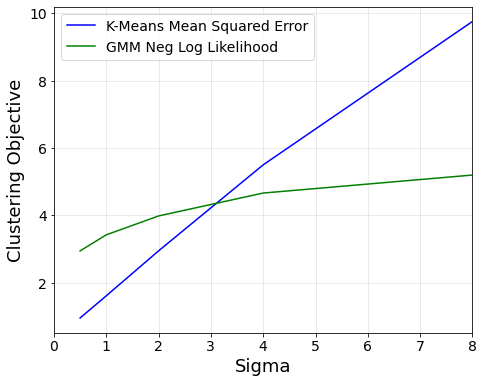

In [289]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_xlabel('Sigma', fontsize=18)
ax.set_ylabel('Clustering Objective', fontsize=18)
ax.set_xlim(0,8)

plt.plot(sigma, km_Score, label = "K-Means Mean Squared Error", color = "blue")
plt.plot(sigma, GMM_neglog, label = "GMM Neg Log Likelihood", color = "green")

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.3 Clustering Objective.png", dpi=300, bbox_inches='tight')

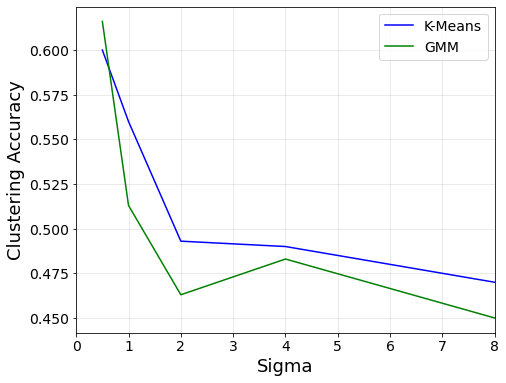

In [290]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_xlabel('Sigma', fontsize=18)
ax.set_ylabel('Clustering Accuracy', fontsize=18)
ax.set_xlim(0,8)

plt.plot(sigma, Best, label = "K-Means", color = "blue")
plt.plot(sigma, GMM_Best, label = "GMM", color = "green")

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.3 Clustering Accuracy.png", dpi=300, bbox_inches='tight')

# Problem 2.4

In [291]:
twoD_set = pd.read_csv(r'/Users/elvis/Documents/Graduate/Courses/CS760/HW5/hw5/data/data2D.csv', header=None)
thousandD_set = pd.read_csv(r'/Users/elvis/Documents/Graduate/Courses/CS760/HW5/hw5/data/data1000D.csv', header=None)

## PCA and DRO

In [292]:
two_d_mat = twoD_set.to_numpy(dtype='float64', copy=False)
thousand_d_mat = thousandD_set.to_numpy(dtype='float64', copy=False)

In [293]:
def svd(mat,d,rec):
    u, s, vT = np.linalg.svd(mat, full_matrices=False)
    s = np.diag(s)
    z = mat@(vT.T)[:,:d]
    x_rec = z@(vT.T)[:,:d].T
    mse = mean_squared_error(mat, x_rec)*(d+1)
    
    if rec == True:
        return(x_rec)
    else:
        return(mse)

In [294]:
def dm_svd(mat_1,d,rec):
    scaler = StandardScaler(with_mean=True, with_std=False)
    mat = scaler.fit_transform(mat_1)
    u, s, vT = np.linalg.svd(mat, full_matrices=False)
    s = np.diag(s)
    z = mat@(vT.T)[:,:d]
    x_rec = scaler.inverse_transform(z@(vT.T)[:,:d].T)
    mse = mean_squared_error(mat_1, x_rec)*(d+1)
    
    if rec == True:
        return(x_rec)
    else:
        return(mse)

In [295]:
def scl_svd(mat_1,d,rec):
    scaler = StandardScaler(with_mean=True, with_std=True)
    mat = scaler.fit_transform(mat_1)
    u, s, vT = np.linalg.svd(mat, full_matrices=False)
    s = np.diag(s)
    z = mat@(vT.T)[:,:d]
    x_rec = scaler.inverse_transform(z@(vT.T)[:,:d].T)
    mse = mean_squared_error(mat_1, x_rec)*(d+1)
    
    if rec == True:
        return(x_rec)
    else:
        return(mse)

In [296]:
def DRO(mat_1,d,rec):
    scaler = StandardScaler(with_mean=True, with_std=False)
    mat = scaler.fit_transform(mat_1)
    u, s, vT = np.linalg.svd(mat, full_matrices=False)
    s = np.diag(s)
    z = mat@(vT.T)[:,:d]
    x_rec = scaler.inverse_transform(z@(vT.T)[:,:d].T)
    mse = mean_squared_error(mat_1, x_rec)*(d+1)
    
    if rec == True:
        return(x_rec)
    else:
        return(mse)

## 2-D

In [297]:
svd(two_d_mat,1,False), dm_svd(two_d_mat,1,False), scl_svd(two_d_mat,1,False), DRO(two_d_mat,1,False)

(0.886903083734794,
 0.010006085628512887,
 0.04947208345477053,
 0.010006085628512887)

### Plots

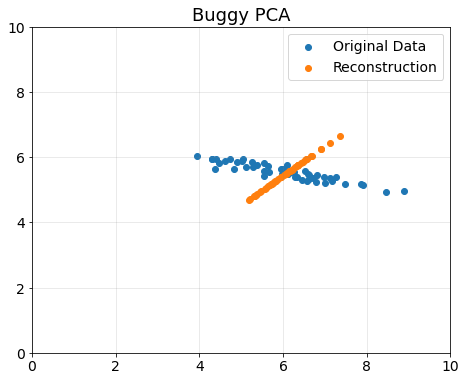

In [314]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_title('Buggy PCA', fontsize=18)
ax.set_xlim(0,10)
ax.set_ylim(0,10)


plt.scatter(twoD_set[0], twoD_set[1], label = 'Original Data')
plt.scatter(svd(two_d_mat,1,True)[:,0], svd(two_d_mat,1,True)[:,1], label = 'Reconstruction')

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.4 2D PCA.png", dpi=300, bbox_inches='tight')

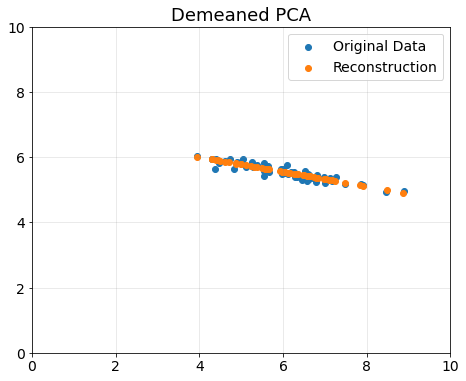

In [307]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_title('Demeaned PCA', fontsize=18)
ax.set_xlim(0,10)
ax.set_ylim(0,10)


plt.scatter(twoD_set[0], twoD_set[1], label = 'Original Data')
plt.scatter(dm_svd(two_d_mat,1,True)[:,0], dm_svd(two_d_mat,1,True)[:,1], label = 'Reconstruction')

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.4 2D Demeaned PCA.png", dpi=300, bbox_inches='tight')

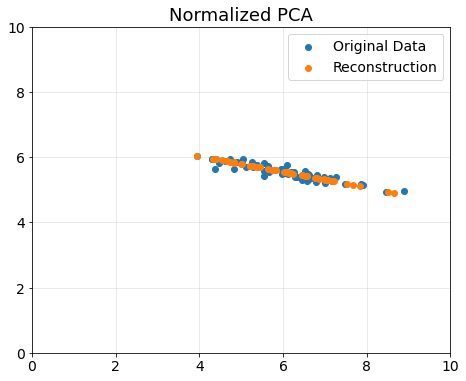

In [308]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_title('Normalized PCA', fontsize=18)
ax.set_xlim(0,10)
ax.set_ylim(0,10)


plt.scatter(twoD_set[0], twoD_set[1], label = 'Original Data')
plt.scatter(scl_svd(two_d_mat,1,True)[:,0], scl_svd(two_d_mat,1,True)[:,1], label = 'Reconstruction')

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.4 2D Normalized PCA.png", dpi=300, bbox_inches='tight')

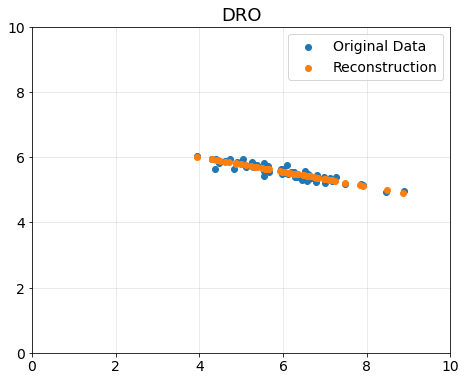

In [309]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_title('DRO', fontsize=18)
ax.set_xlim(0,10)
ax.set_ylim(0,10)


plt.scatter(twoD_set[0], twoD_set[1], label = 'Original Data')
plt.scatter(DRO(two_d_mat,1,True)[:,0], DRO(two_d_mat,1,True)[:,1], label = 'Reconstruction')

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.4 2D DRO.png", dpi=300, bbox_inches='tight')

## 1000-D

In [302]:
u_thous, s_thous, vT_thous = np.linalg.svd(thousand_d_mat, full_matrices=False)

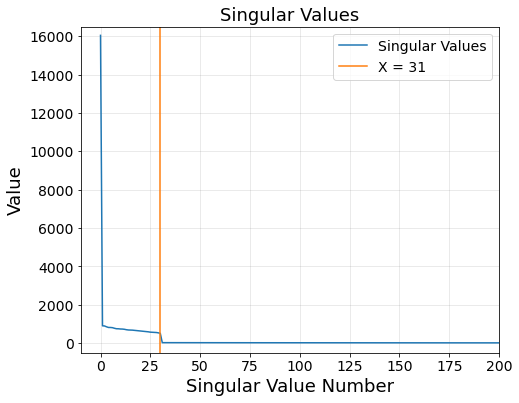

In [313]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_title('Singular Values', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.set_xlabel('Singular Value Number', fontsize=18)
ax.set_xlim(-10,200)
ax.set_ylim(-500,16500)

plt.plot(np.arange(0,500,1), s_thous, label = "Singular Values")
plt.plot([30,30],[-500,16500], label = "X = 31")

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW5/Problem 2.4 Singular Values.png", dpi=300, bbox_inches='tight')

In [304]:
svd(thousand_d_mat,31,False), dm_svd(thousand_d_mat,31,False), scl_svd(thousand_d_mat,31,False), DRO(thousand_d_mat,31,False)

(8.728638375098065, 8.68465933508077, 8.705885656812908, 8.68465933508077)